## Section 2.1.2

In [1]:
# -*- coding: utf-8 -*-
"""
Created on Fri Apr 10 15:47:40 2020

@author: usman
"""

from sklearn.datasets import make_regression
import matplotlib.pyplot as plt
import numpy as np

X, y= make_regression(n_samples=100, n_features=3, noise=1.0, bias=50)

y = y.reshape(y.shape[0],1)


In [2]:
print(X.shape)  
print(y.shape)  

(100, 3)
(100, 1)


In [3]:
def define_parameters(n_weights):  
    a = np.random.randn( n_weights, 1)  
    b = np.random.randn()  
    return a, b  

In [4]:
def predictions(a, b , X):  
    z = np.dot(X,a) + b  
    return z  

In [5]:
def find_cost(z,y):  
    m = y.shape[0]  
    total_cost = (1/m) * np.sum(np.square(z - y))  
    return total_cost  

In [6]:
def find_derivatives(X,y,z):  
    m = y.shape[0]  
    dz = (1/m)*(z-y)  
    dw = np.dot(X.T, dz)  
    db = np.sum(dz)  
      
    return dw, db  

In [7]:
def update_parameters(a, b, da, db, lr):  
    a = a - lr * da  
    b = b - lr * db  
  
    return a, b  

In [8]:

def linear_regressionm(X, y, lr, epochs):  
    error_list = []  
    lenw = X.shape[1]  
    a,b = define_parameters(lenw)  
  
    for i in range(epochs):  
        z = predictions(a, b, X)  
        cost = find_cost(z,y)  
        error_list.append(cost)  
        da, db = find_derivatives(X, y, z)  
        a, b = update_parameters(a, b, da, db, lr)  
        if i % 50 == 0 :  
            print(cost)  
  
    return error_list  

In [10]:
lr = 0.01  
epochs = 1000  
error_list = linear_regressionm(X,y,lr,epochs)  


17461.950003132533
7260.946268081211
3055.4766569221965
1298.8832803638159
557.003170156412
240.763790365987
104.92221790851863
46.20062160956383
20.684353482630986
9.549659058573715
4.673923869777418
2.5328977556727743
1.5905870791890133
1.1750889440530479
0.9916065992015999
0.9104832693268997
0.8745809096388025
0.8586791757353913
0.8516315267106046
0.848506390322606


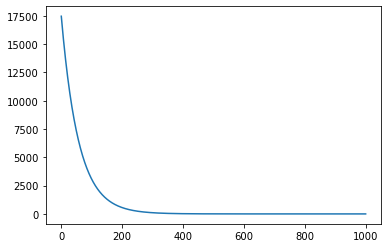

In [11]:
plt.plot(error_list)